# Retail Giant Sales Forecasting Assignment

![](https://sopsa.org/wp-content/uploads/2020/07/Sales-Forecast.jpeg)

Global Mart is an online supergiant store that has worldwide operations. This store takes orders and delivers across the globe and deals with all the major product categories — consumer, corporate and home office.
We need to find out the most consistently profitable market-segment from all and forecast the sales and demand for that single market-segment.

### Import required packages

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Reading the Dataset

In [2]:
data = pd.read_csv('../input/global-superstore/GlobalSuperstoreData.csv')
data.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


### Convering the Order Date into Month Year format

In [3]:
data['Order Date'] = pd.to_datetime(data['Order Date']).dt.to_period('m')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype    
---  ------      --------------  -----    
 0   Order Date  51290 non-null  period[M]
 1   Segment     51290 non-null  object   
 2   Market      51290 non-null  object   
 3   Sales       51290 non-null  float64  
 4   Profit      51290 non-null  float64  
dtypes: float64(2), object(2), period[M](1)
memory usage: 2.0+ MB


### Merging the Market and Segment columns to get Unique Market Segments

In [5]:
data['Market Segment'] = data['Market'] + ' ' + data['Segment']
data = data.drop(['Segment','Market'],axis=1)
data.head()

,Order Date,Sales,Profit,Market Segment
0,2012-07,2309.650,762.1845,US Consumer
1,2013-05,3709.395,-288.7650,APAC Corporate
2,2013-10,5175.171,919.9710,APAC Consumer
3,2013-01,2892.510,-96.5400,EU Home Office
4,2013-05,2832.960,311.5200,Africa Consumer


### Defining a dataset to get aggregated value of profit for each segment 

In [6]:
data_p = data.pivot_table(index='Order Date',values='Profit',columns='Market Segment',aggfunc='sum')
data_p.head()

Market Segment,APAC Consumer,APAC Corporate,APAC Home Office,Africa Consumer,Africa Corporate,Africa Home Office,Canada Consumer,Canada Corporate,Canada Home Office,EMEA Consumer,...,EMEA Home Office,EU Consumer,EU Corporate,EU Home Office,LATAM Consumer,LATAM Corporate,LATAM Home Office,US Consumer,US Corporate,US Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,-173.7264,230.2656,265.539,520.026,391.515,447.33,12.57,NaN,-2952.594,...,392.526,2259.8670,841.3875,2534.568,540.44312,1021.05924,-26.59744,2465.8368,643.3689,1233.9329
2011-02,4627.8531,3600.7776,617.5407,-201.888,-31.689,825.606,26.43,9.24,87.99,464.160,...,368.070,-783.9945,2234.4060,162.255,1227.86616,814.03020,-356.80440,1853.5541,421.9256,553.9467
2011-03,2337.8319,3634.9365,205.1052,919.074,244.437,83.430,82.47,NaN,84.03,706.380,...,-15.570,1273.7100,2206.5960,269.745,2427.39612,178.66400,769.88400,204.2007,127.4696,-268.9314
2011-04,633.6423,90.7521,603.8478,381.315,941.751,417.618,55.08,6.51,NaN,121.353,...,-456.510,2980.0065,981.1470,130.371,1368.82948,872.64068,-554.22952,1434.8636,494.7315,2723.4358
2011-05,3838.9500,1028.4489,102.0315,-39.981,490.650,39.180,0.87,NaN,NaN,172.554,...,-33.591,673.0080,1719.0600,443.310,1749.39200,134.87252,-397.95600,833.9433,2912.7976,145.7781


In [7]:
data_p.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 48 entries, 2011-01 to 2014-12
Freq: M
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   APAC Consumer       48 non-null     float64
 1   APAC Corporate      48 non-null     float64
 2   APAC Home Office    48 non-null     float64
 3   Africa Consumer     48 non-null     float64
 4   Africa Corporate    48 non-null     float64
 5   Africa Home Office  48 non-null     float64
 6   Canada Consumer     43 non-null     float64
 7   Canada Corporate    40 non-null     float64
 8   Canada Home Office  28 non-null     float64
 9   EMEA Consumer       48 non-null     float64
 10  EMEA Corporate      48 non-null     float64
 11  EMEA Home Office    47 non-null     float64
 12  EU Consumer         48 non-null     float64
 13  EU Corporate        48 non-null     float64
 14  EU Home Office      48 non-null     float64
 15  LATAM Consumer      48 non-null     flo

### Calculating CoV

To find the most consistently profitable market-segment we will be using a measure called "Coefficient of Variation (CoV)". The coefficient of variation or CoV is nothing but the ratio of the standard deviation to mean for the data that it is being calculated for.

In [8]:
# Test Train split to calculate the CoV score for the initial 42 months
train_len=42
train_data = data_p[0:train_len]
test_data = data_p[train_len+1:]

In [9]:
# Calculating train data mean
train_data.mean()

Market Segment
APAC Consumer         4400.894243
APAC Corporate        2574.919807
APAC Home Office      1511.088314
Africa Consumer        957.707000
Africa Corporate       412.617571
Africa Home Office     377.221071
Canada Consumer        225.987632
Canada Corporate        90.980294
Canada Home Office     118.003750
EMEA Consumer          423.960286
EMEA Corporate         182.642643
EMEA Home Office        84.231366
EU Consumer           3699.977143
EU Corporate          2216.299429
EU Home Office        1224.456536
LATAM Consumer        2295.555697
LATAM Corporate       1122.633016
LATAM Home Office      818.398941
US Consumer           2686.740912
US Corporate          1754.199083
US Home Office        1132.065762
dtype: float64

In [10]:
# Calculating train data standard deviation
train_data.std()

Market Segment
APAC Consumer         2328.343041
APAC Corporate        1381.381825
APAC Home Office      1541.976104
Africa Consumer       1270.143926
Africa Corporate       790.028612
Africa Home Office     768.526445
Canada Consumer        286.348653
Canada Corporate       164.936757
Canada Home Office     285.647164
EMEA Consumer         1138.184151
EMEA Corporate        1174.768016
EMEA Home Office       659.373878
EU Consumer           2228.977594
EU Corporate          1619.735425
EU Home Office        1162.551208
LATAM Consumer        1588.659231
LATAM Corporate       1002.365692
LATAM Home Office      968.879479
US Consumer           2747.942085
US Corporate          1902.991919
US Home Office        1287.900959
dtype: float64

In [11]:
# Calculating CoV value
train_data.std()/train_data.mean()

Market Segment
APAC Consumer         0.529061
APAC Corporate        0.536476
APAC Home Office      1.020441
Africa Consumer       1.326234
Africa Corporate      1.914675
Africa Home Office    2.037337
Canada Consumer       1.267099
Canada Corporate      1.812884
Canada Home Office    2.420662
EMEA Consumer         2.684648
EMEA Corporate        6.432058
EMEA Home Office      7.828128
EU Consumer           0.602430
EU Corporate          0.730829
EU Home Office        0.949443
LATAM Consumer        0.692059
LATAM Corporate       0.892870
LATAM Home Office     1.183872
US Consumer           1.022779
US Corporate          1.084821
US Home Office        1.137656
dtype: float64

Observation: As we can see APAC Consumer has the least CoV value which means it has the lowest Standard Deviation or highest mean which in turns prove that it is most consistently profitable.

### Subsetting the rows for APAC Consumer only

In [12]:
data_new = data[data['Market Segment'] == 'APAC Consumer']
data_new.head()

,Order Date,Sales,Profit,Market Segment
2,2013-10,5175.171,919.971,APAC Consumer
6,2011-07,1822.080,564.840,APAC Consumer
7,2012-04,5244.840,996.480,APAC Consumer
14,2013-06,3701.520,1036.080,APAC Consumer
29,2012-02,1878.720,582.360,APAC Consumer


### Grouping all the data since we need it in monthly aggregated value

In [13]:
data_new = data_new.groupby(['Order Date']).sum()
data_new.head()

,Sales,Profit
Order Date,,
2011-01,18821.9898,2254.4898
2011-02,23313.3531,4627.8531
2011-03,26518.4919,2337.8319
2011-04,12046.0923,633.6423
2011-05,25941.9000,3838.9500


### Since it is univariate analysis we will continue with Sales only

In [14]:
data = data_new.drop('Profit',axis=1)
data.head()

,Sales
Order Date,
2011-01,18821.9898
2011-02,23313.3531
2011-03,26518.4919
2011-04,12046.0923
2011-05,25941.9000


In [15]:
# Converting Order Date to from DateTime format to timestamp so that it will not through an error
# while applying modelling technique.
data=data.to_timestamp()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2011-01-01 to 2014-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes


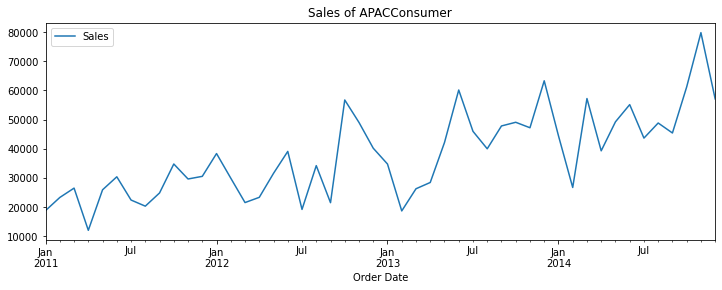

In [16]:
#plotting the sales of APAC Consumer
data.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Sales of APACConsumer')
plt.show()

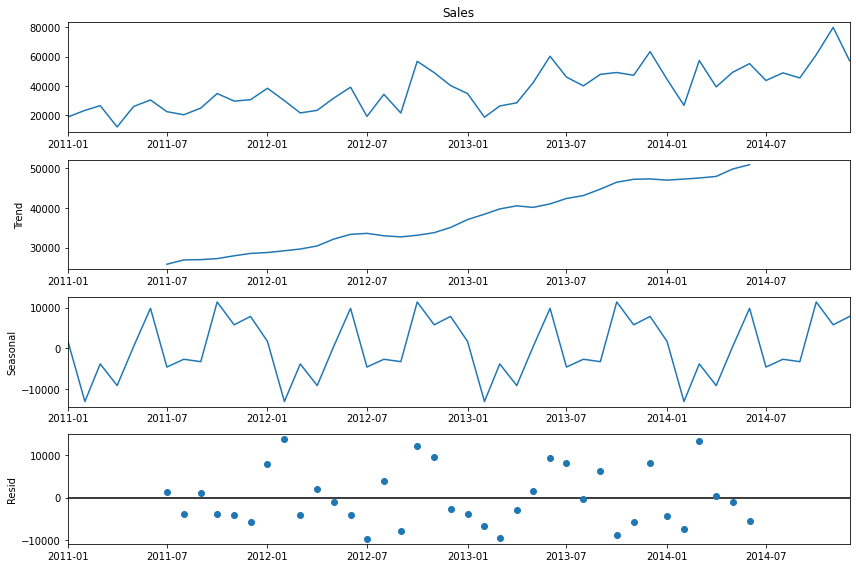

In [17]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(data.Sales)
fig = decomposition.plot()
plt.show()

## Forecasting using different algorithms

In [18]:
train_len = 42
train = data[0:train_len]
test = data[train_len:]

### Simple exponential smoothing

In [19]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Sales'])
model_fit = model.fit(smoothing_level=0.2,optimized=False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(len(test))

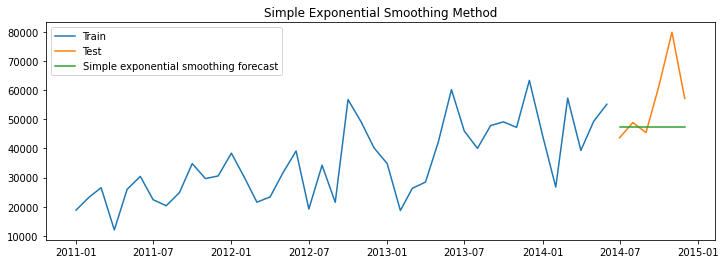

In [20]:
#Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

In [21]:
#Calculating RMSE & MAPE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ses['ses_forecast'])/test['Sales'])*100,2)
results = pd.DataFrame({'Method':['Simple exponential smoothing forecast'],'RMSE': [rmse] ,'MAPE': [mape]})
results = results[['Method', 'RMSE', 'MAPE']]
results


,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,15011.49,15.99


## Holt’s exponential smoothing

In [22]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2642857142857143, 'smoothing_trend': 0.19220779220779222, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 18821.9898, 'initial_trend': 4491.363300000001, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


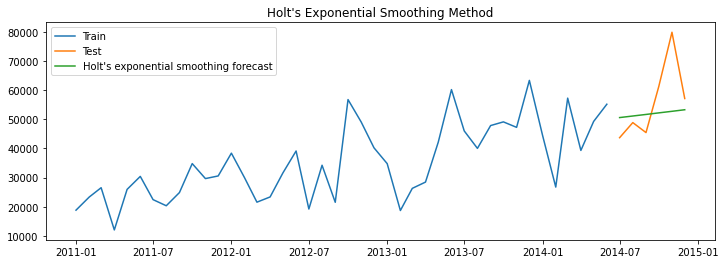

In [23]:
#Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

In [24]:
#Calculating RMSE & MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_holt['holt_forecast'])/test['Sales'])*100,2)
tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse] ,'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results



,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,12403.84,14.93


## Holt-Winters’ exponential smoothing - Additive

In [25]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.07571428571428572, 'smoothing_trend': 0.010816326530612248, 'smoothing_seasonal': 0.1026984126984127, 'damping_trend': nan, 'initial_level': 34110.965325000005, 'initial_trend': 730.4167145833334, 'initial_seasons': array([-15288.975525, -10797.612225,  -7592.473425, -22064.873025,
        -8169.065325,  -3712.033725, -11679.370425, -13779.891825,
        -9250.570425,    676.322775,  -4462.610625,  -3556.103925]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


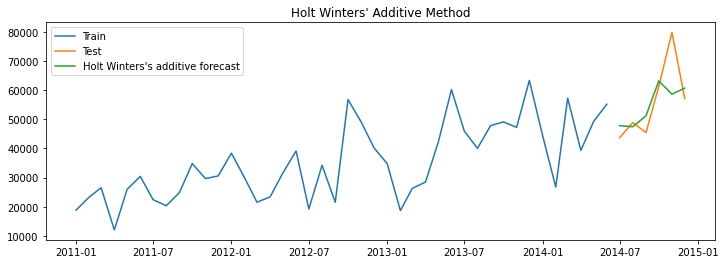

In [26]:
#Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

In [27]:
#Calculating RMSE & MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwa['hw_forecast'])/test['Sales'])*100,2)
tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'],'RMSE': [rmse] , 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results



,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,12403.84,14.93
0,Holt Winters' additive method,9306.82,10.17


## Holt-Winters’ exponential smoothing - Multiplicative

In [28]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.040357142857142855, 'smoothing_trend': 0.0001, 'smoothing_seasonal': 0.13709183673469388, 'damping_trend': nan, 'initial_level': 34110.965325000005, 'initial_trend': 730.4167145833334, 'initial_seasons': array([0.55178708, 0.68345627, 0.77741839, 0.35314428, 0.76051498,
       0.8911777 , 0.65760657, 0.5960275 , 0.72880948, 1.01982714,
       0.86917372, 0.89574895]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


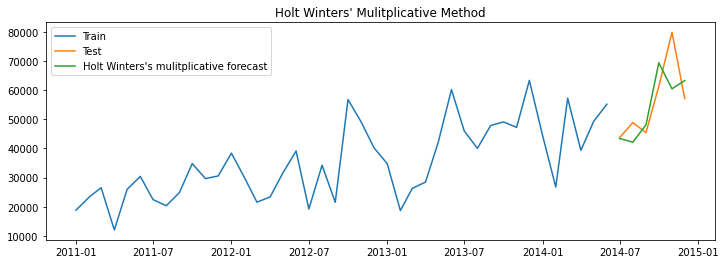

In [29]:
#Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

In [30]:
#Calculating RMSE & MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwm['hw_forecast'])/test['Sales'])*100,2)
tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse] ,'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results


,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,12403.84,14.93
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43


In [31]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data['Sales'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -3.376024
Critical Values @ 0.05: -2.93
p-value: 0.011804


For ADF test p-value is <=0.05 , means series is stationary

In [32]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data['Sales'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.577076
Critical Values @ 0.05: 0.46
p-value: 0.024720


For KPSS test p-value is not > 0.05 , means series is not stationary

### Box Cox transformation to make variance constant

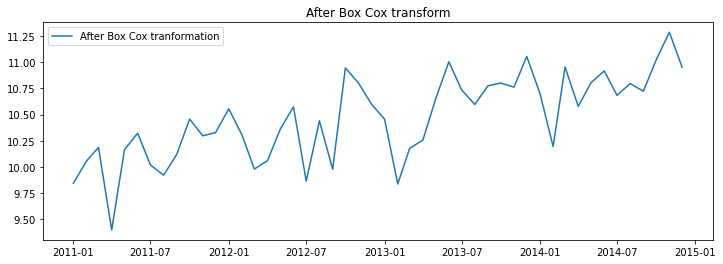

In [33]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data['Sales'], lmbda=0), index = data.index) # lmbda=0 implies log transformation

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

### Differencing to remove trend

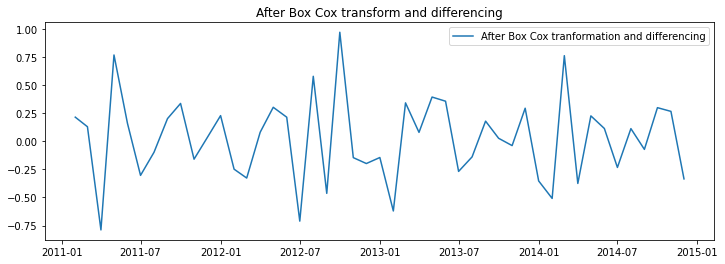

In [34]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), data.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [35]:
data_boxcox_diff.dropna(inplace=True)

In [36]:
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -4.535011
Critical Values @ 0.05: -2.95
p-value: 0.000170


In [37]:
kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.156456
Critical Values @ 0.05: 0.46
p-value: 0.100000


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1911: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


For KPSS test p-value is > 0.05, means series is stationary now

### Autocorrelation function (ACF)

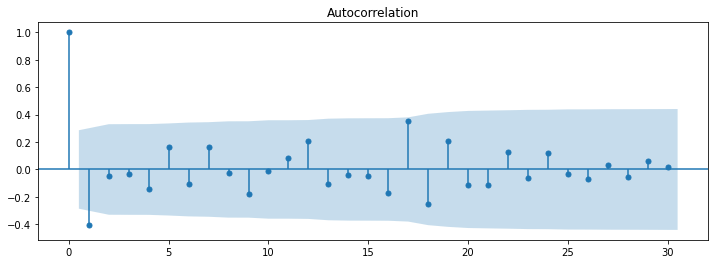

In [38]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()

As you can see, the highest lag after which the
autocorrelation dies down is 1. Thus q =1 will be suitable for the problem.


### Partial autocorrelation function (PACF)

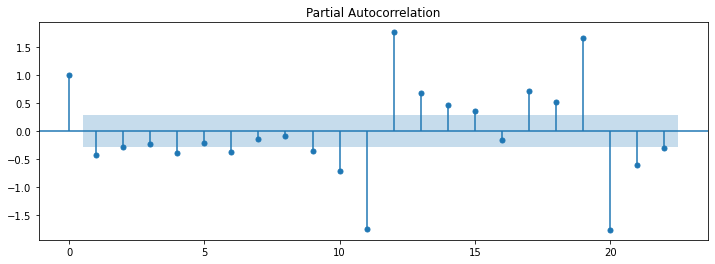

In [39]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags = 22)
plt.show()

In the PACF plot above, the highest lag for which the partial autocorrelation is significantly high is the p = 1. Thus this value of p will be suitable while using the ARIMA techniques.

In [40]:
train_data_boxcox = data_boxcox[:train_len] # Arima and Sarima
test_data_boxcox = data_boxcox[train_len:]

train_data_boxcox_diff = data_boxcox_diff[:train_len-1] #Rest
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

# Differencing and boxcox done on the entire data, hence need to split it again

# AR model


In [41]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params) # gives the intercept and coefficient values

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.79003D-01    |proj g|=  3.11493D-02

At iterate    5    f=  3.78937D-01    |proj g|=  1.66533D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6     12      1     0     0   0.000D+00   3.789D-01
  F =  0.37893743431042992     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
const      0.024255
ar.L1.y   -0.406729
dtype: float64


 This problem is unconstrained.


In [42]:
# In order to make the forecast, we need to transform the forecasts made to the original form
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])
# In order to get back the original time series we do a cumulative sum to remove the differencing and exponentiate the 
# forecasts in order to remove the effect of the boxcox transformation

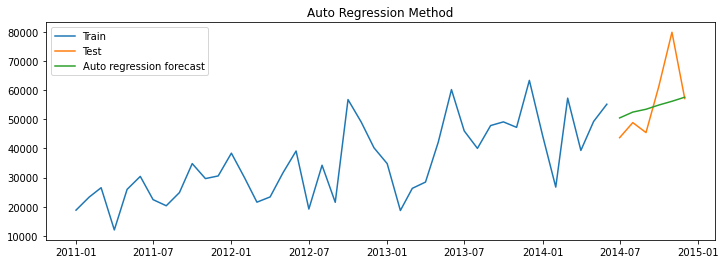

In [43]:
#Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

In [44]:
#Calculating RMSE & MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ar['ar_forecast'][test.index.min():])/test['Sales'])*100,2)
tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse] ,'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results


,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,12403.84,14.93
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56


# MA model


In [45]:
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.14970D-01    |proj g|=  7.87627D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4     18      1     0     0   3.744D-06   1.977D-01
  F =  0.19774350585307726     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
const      0.021415
ma.L1.y   -1.000000
dtype: float64


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


In [46]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

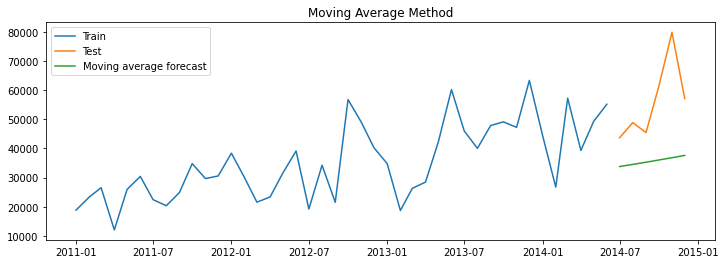

In [47]:
#Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(data['Sales'][:train_len], label='Train')
plt.plot(data['Sales'][train_len:], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

In [48]:
#Calculating RMSE & MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ma['ma_forecast'][test.index.min():])/test['Sales'])*100,2)
tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'RMSE': [rmse] ,'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results


,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,12403.84,14.93
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93


# ARMA model


In [49]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.03937D-01    |proj g|=  5.22361D+00

At iterate    5    f=  1.96128D-01    |proj g|=  4.62608D-01

At iterate   10    f=  1.94984D-01    |proj g|=  7.91407D-02

At iterate   15    f=  1.94981D-01    |proj g|=  5.27356D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     21      1     0     0   5.274D-08   1.950D-01
  F =  0.19498083674530511     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
const   

 This problem is unconstrained.


In [50]:
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

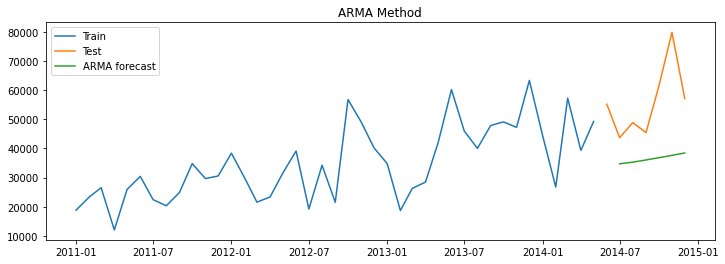

In [51]:
#Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot( data['Sales'][:train_len-1], label='Train')
plt.plot(data['Sales'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

In [52]:
#Calculating RMSE & MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arma['arma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arma['arma_forecast'][train_len-1:])/test['Sales'])*100,2)
tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'RMSE': [rmse] ,'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,12403.84,14.93
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93
0,Autoregressive moving average (ARMA) method,22654.32,32.40


# ARIMA model


In [53]:
model = ARIMA(train_data_boxcox, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.params)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.03937D-01    |proj g|=  5.22361D+00

At iterate    5    f=  1.96128D-01    |proj g|=  4.62608D-01

At iterate   10    f=  1.94984D-01    |proj g|=  7.91407D-02

At iterate   15    f=  1.94981D-01    |proj g|=  5.27356D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     21      1     0     0   5.274D-08   1.950D-01
  F =  0.19498083674530511     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
const   

 This problem is unconstrained.


In [54]:
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

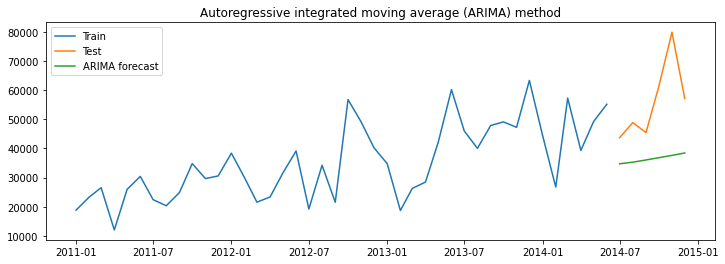

In [55]:
#Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

In [56]:
#Calculating RMSE & MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ar['ar_forecast'][test.index.min():])/test['Sales'])*100,2)
tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'],'RMSE': [rmse] ,'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results


,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,12403.84,14.93
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93
0,Autoregressive moving average (ARMA) method,22654.32,32.40
0,Autoregressive integrated moving average (ARIM...,10985.28,13.56


# SARIMA model

In [57]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 0, 12)) 
model_fit = model.fit()
print(model_fit.params)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.96237D-01    |proj g|=  2.47927D-01

At iterate    5    f=  2.62025D-01    |proj g|=  3.48913D-01

At iterate   10    f=  2.03389D-01    |proj g|=  4.15813D-02


 This problem is unconstrained.



At iterate   15    f=  2.01788D-01    |proj g|=  2.12967D-02

At iterate   20    f=  2.01417D-01    |proj g|=  6.82336D-03

At iterate   25    f=  2.01392D-01    |proj g|=  3.41610D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     50      1     0     0   5.482D-04   2.014D-01
  F =  0.20138684853363159     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ar.L1      -0.039410
ma.L1      -0.996757
ar.S.L12   -0.485846
sigma2      0.082142
dtype: float64


In [58]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

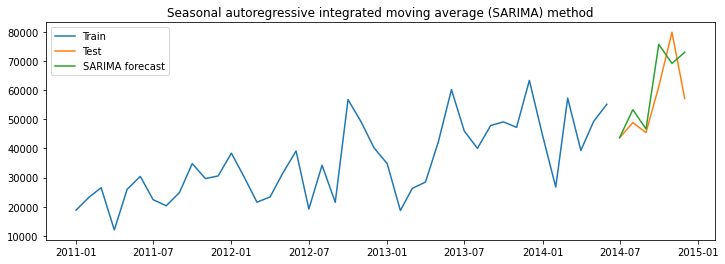

In [59]:
#Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

In [60]:
#Calculating RMSE & MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Sales'])*100,2)
tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'RMSE': [rmse] ,'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results


,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,12403.84,14.93
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93
0,Autoregressive moving average (ARMA) method,22654.32,32.40
0,Autoregressive integrated moving average (ARIM...,10985.28,13.56
0,Seasonal autoregressive integrated moving aver...,9985.65,12.78


Observation: As we can see that RMSE and MAPE values of Holt Winters' additive method, Holt Winters' multiplicative method and SARIMA are the least. But as per the forecast plot, we can see much better forecasting in SARIMA Plot. So if we look only into smoothing techniques then Holt Winters' additive forecasting method will be the best and for the ARIMA set of techniques SARIMA forecasting method will be the best. But overall SARIMA forecasting method will be the best forecasting method for this case study.